In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [22]:
file1 = open("communities.names", "r+")
lines = file1.readlines()
file1.close() 

In [24]:
lines2 = lines[75:(75+128)]
lines2 = [str(i).replace('\n','').replace('@attribute','').strip() for i in lines2]

In [29]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
df = pd.read_csv(path, index_col=False,names=lines2)

In [34]:
y = df['ViolentCrimesPerPop numeric']
X = df.drop(columns=['ViolentCrimesPerPop numeric'],axis=1)

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 127 entries, state numeric to PolicBudgPerPop numeric
dtypes: float64(99), int64(2), object(26)
memory usage: 1.9+ MB


In [41]:
X.select_dtypes(np.number)

,state numeric,fold numeric,population numeric,householdsize numeric,racepctblack numeric,racePctWhite numeric,racePctAsian numeric,racePctHisp numeric,agePct12t21 numeric,agePct12t29 numeric,...,NumStreet numeric,PctForeignBorn numeric,PctBornSameState numeric,PctSameHouse85 numeric,PctSameCity85 numeric,PctSameState85 numeric,LandArea numeric,PopDens numeric,PctUsePubTrans numeric,LemasPctOfficDrugUn numeric
0,8,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32
1,53,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00
2,24,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00
3,34,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00
4,42,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00
1990,6,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00
1991,9,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91
1992,25,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22


In [43]:
X['community numeric'].value_counts()

?        1177
16000       2
62430       2
82000       2
21000       2
         ... 
60785       1
63360       1
65392       1
71390       1
72600       1
Name: community numeric, Length: 800, dtype: int64

<AxesSubplot:>

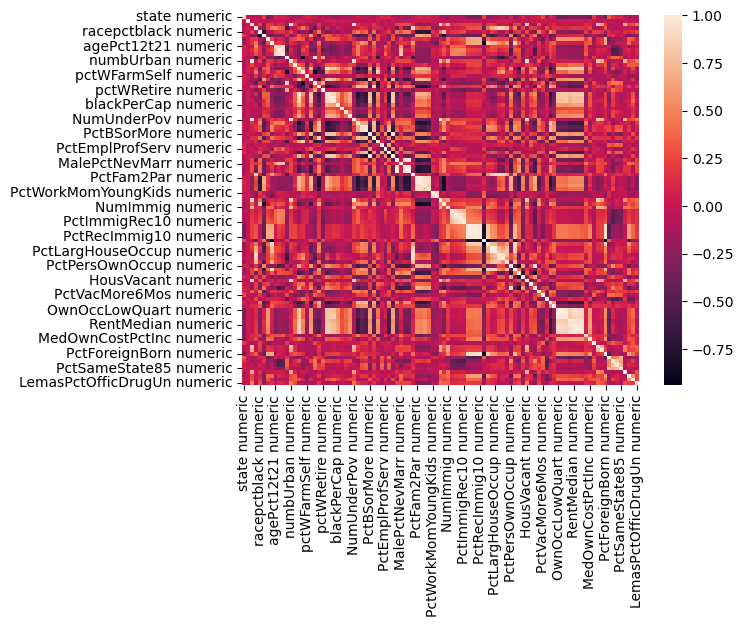

In [48]:
sns.heatmap(X.corr())

In [2]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns= ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','over50']
train_set = pd.read_csv(path, index_col=False,names=columns)

In [3]:
path_test = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
test_set = pd.read_csv(path_test,skiprows=1, index_col=False,names=columns)

In [6]:
train_set.shape

(32561, 15)

In [9]:
data = pd.concat([train_set,test_set])

In [11]:
data['over50'] = data['over50'].str.replace('.','')

C:\Users\srodriguezb\AppData\Local\Temp\ipykernel_2508\3185916284.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['over50'] = data['over50'].str.replace('.','')


In [12]:
data = pd.get_dummies(data,drop_first=True)

In [16]:
data.columns = [ str(i).strip().replace(' ','') for i in data.columns]

In [20]:
data['over50_>50K'].sum()/data.shape[0]

0.23928176569346055

In [40]:
train = data.iloc[:train_set.shape[0],:]
test = data.iloc[train_set.shape[0]:,:]

In [41]:
X_train,y_train = train.iloc[:,:100],train.iloc[:,100:]
X_test,y_test = test.iloc[:,:100],test.iloc[:,100:]

In [42]:
y_train = y_train.to_numpy().ravel()

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
m_NB = GaussianNB()
m_NB.fit(X_train,y_train)

GaussianNB()

In [45]:
y_pred = m_NB.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred)

0.7957127940544193

In [57]:
pipeline = Pipeline([('scaler',StandardScaler()),('log',LogisticRegression(penalty='l1',C = 0.1,solver='saga',max_iter=400))])

#log = LogisticRegression(penalty='l1',C = 0.1,solver='saga',max_iter=400)
pipeline.fit(X_train,y_train)

C:\Users\srodriguezb\Anaconda3\envs\introds\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('log',
                 LogisticRegression(C=0.1, max_iter=400, penalty='l1',
                                    solver='saga'))])

In [60]:
y_pred = pipeline.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred)

0.85283459246975